# WaveNet Training

In [1]:
from model import WaveNetModel, Optimizer, WaveNetData

import torch
import numpy as np
import time

from IPython.display import Audio
from IPython.core.debugger import Tracer
from matplotlib import pyplot as plt
from matplotlib import pylab as pl
from IPython import display

%matplotlib notebook

## Setup Model

In [2]:
train_sample = "train_samples/saber.wav"
layers = 10
blocks = 2
classes = 128
hidden_channels = 32
kernel_size = 8

use_cuda = torch.cuda.is_available()

In [3]:
model = WaveNetModel(num_layers=layers,
                     num_blocks=blocks,
                     num_classes=classes,
                     hidden_channels=hidden_channels,
                     kernel_size=kernel_size)

if use_cuda:
    model.cuda()
    print("use cuda")

#print("model: ", model)
print("scope: ", model.scope)
print(model.parameter_count(), " parameters")

data = WaveNetData(train_sample,
                   input_length=model.scope,
                   target_length=model.last_block_scope,
                   num_classes=model.num_classes,
                   cuda=use_cuda)

scope:  14834
180608  paramaters


<IPython.core.display.Javascript object>


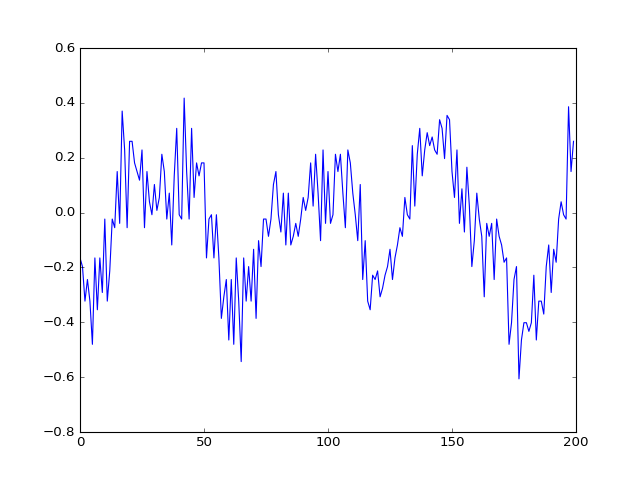

In [4]:
start_tensor = data.get_minibatch([model.scope])[0].squeeze()

plt.ion()
plt.plot(start_tensor[-200:].numpy())
plt.ioff()

## Train Model

In [8]:
learning_rate = 0.001
mini_batch_size = 4
avg_length = 4
epochs = 100

In [9]:
optimizer = Optimizer(model,
                      learning_rate=learning_rate,
                      stop_threshold=0.1,
                      avg_length=avg_length,
                      mini_batch_size=mini_batch_size)

def hook(losses):
    ax.clear()
    ax.plot(losses)
    fig.canvas.draw()
    
optimizer.hook = hook

<IPython.core.display.Javascript object>


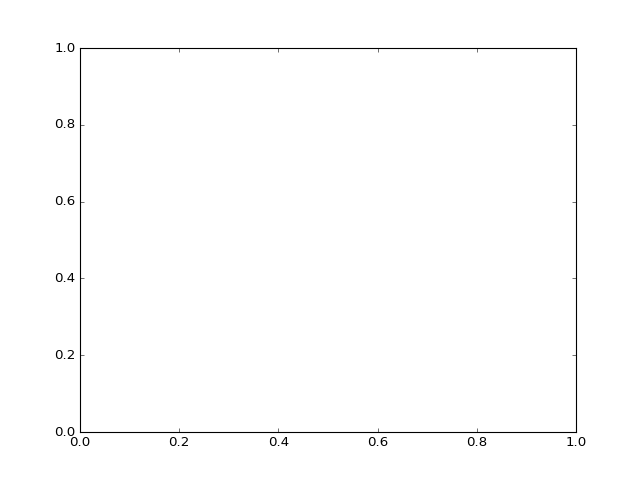

start training...
epoch  0


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

print('start training...')
tic = time.time()
optimizer.train(data, epochs=epochs)
toc = time.time()
print('Training took {} seconds.'.format(toc-tic))

In [11]:
torch.save(model.state_dict(), "model_parameters/saber_10-2-128-32-8")